<a href="https://colab.research.google.com/github/anasofiatoro/Competencia-Kaggle/blob/main/04%20-%20modelo%20con%20preprocesado%20de%20otra%20forma%20y%20Random%20Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
import opendatasets as od

# Carga del dataset


In [ ]:

dataset_url = 'https://www.kaggle.com/competitions/udea-ai4eng-20242'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: marfakleber
Your Kaggle Key: ··········


100%|██████████| 20.1M/20.1M [00:00<00:00, 118MB/s] 


Extracting archive ./udea-ai4eng-20242/udea-ai4eng-20242.zip to ./udea-ai4eng-20242


In [ ]:
import os
os.chdir('/content/udea-ai4eng-20242')
os.listdir()

['test.csv', 'train.csv', 'submission_example.csv']

In [ ]:
import pandas as pd
archivo= "train.csv"
pd.read_csv(archivo)


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

In [ ]:
print("Información general del dataset:")
df.info()
print("\nDistribución de la variable objetivo (RENDIMIENTO_GLOBAL):")
print(df['RENDIMIENTO_GLOBAL'].value_counts())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dt

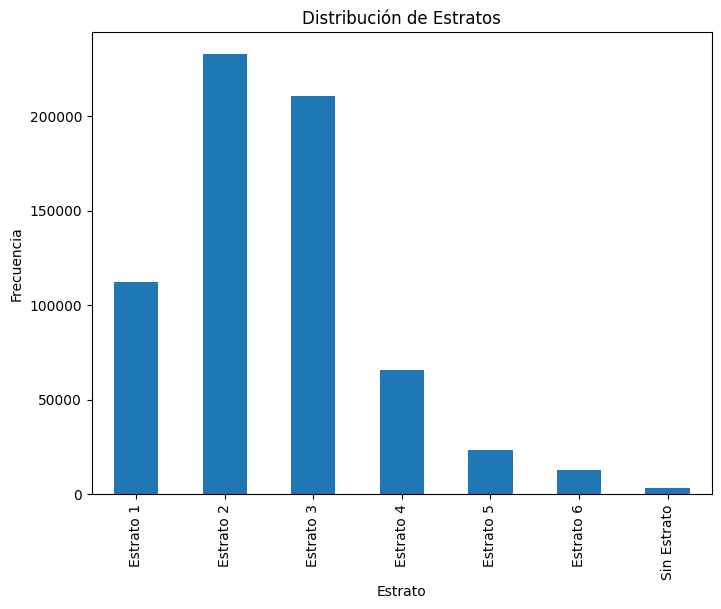

In [ ]:
column_name = 'FAMI_ESTRATOVIVIENDA'

plt.figure(figsize=(8,6))
df[column_name].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Estratos')
plt.xlabel('Estrato')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
                  ID        PERIODO
count  692500.000000  692500.000000
mean   494606.130576   20198.366679
std    285585.209455      10.535037
min         1.000000   20183.000000
25%    247324.750000   20195.000000
50%    494564.500000   20195.000000
75%    741782.500000   20203.000000
max    989286.000000   20213.000000


In [ ]:
 # Cargar el archivo CSV en un DataFrame
df = pd.read_csv('train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

In [ ]:
# Generación de estadisticas descriptivas sobre la base de datos
df.describe()

,ID,PERIODO
count,692500.000000,692500.000000
mean,494606.130576,20198.366679
std,285585.209455,10.535037
min,1.000000,20183.000000
25%,247324.750000,20195.000000
50%,494564.500000,20195.000000
75%,741782.500000,20203.000000
max,989286.000000,20213.000000


In [ ]:
# Verificamos las columnas categóricas que contienen strings
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Columnas categóricas: {categorical_columns}")

Columnas categóricas: Index(['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')


In [ ]:
# Revisamos las columnas con valores numéricos pero almacenados como texto
print(df['ESTU_VALORMATRICULAUNIVERSIDAD'].unique())

['Entre 5.5 millones y menos de 7 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones' 'Más de 7 millones'
 'Entre 1 millón y menos de 2.5 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'No pagó matrícula' nan]


In [ ]:
# Mapeamos los valores de la columna 'ESTU_VALORMATRICULAUNIVERSIDAD' a valores numéricos
valormatricula_map = {
    'Entre 500 mil y menos de 1 millón': 0.75,
    'Entre 1 millón y menos de 2.5 millones': 1.75,
    'Entre 2.5 millones y menos de 4 millones': 3.25,
    'Entre 4 millones y menos de 5.5 millones': 4.75,
    'Entre 5.5 millones y menos de 7 millones': 6.25
}

df['ESTU_VALORMATRICULAUNIVERSIDAD'] = df['ESTU_VALORMATRICULAUNIVERSIDAD'].map(valormatricula_map)

In [ ]:
# Verificamos si hay valores nulos después de la conversión
print(df['ESTU_VALORMATRICULAUNIVERSIDAD'].isnull().sum())

174092


# Aplicando One Hot Encodign a columnas necesarias

In [ ]:
# Convertimos el resto de las columnas categóricas en one-hot encoding
df_final = pd.get_dummies(df, drop_first=True)

In [ ]:
# Normalizamos las columnas numéricas
numerical_columns = df_final.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Normalizamos utilizando StandardScaler
scaler = StandardScaler()
df_final[numerical_columns] = scaler.fit_transform(df_final[numerical_columns])

print("\nDataset con variables numéricas normalizadas:")
print(df_final.head())


Dataset con variables numéricas normalizadas:
         ID   PERIODO  ESTU_VALORMATRICULAUNIVERSIDAD  \
0  1.434424  1.294094                        2.238811   
1  0.527513  1.294094                        0.344422   
2 -0.652132  0.439801                        0.344422   
3 -0.084924 -0.319570                        1.291616   
4  1.731274  1.294094                        0.344422   

   ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   ESTU_PRGM_ACADEMICO_ACUICULTURA  ESTU_PRGM_ACADEMICO_ADMINISTRACION  \
0                            False                               False   
1                            False                               False   
2                            False                               Fals

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Cargar los datos
df = pd.read_csv('train.csv')

# Columnas que necesitan imputación
columns_to_impute = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
                     'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
                     'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO']

# Imputar valores faltantes
imputer_cat = SimpleImputer(strategy='most_frequent')
df[columns_to_impute] = imputer_cat.fit_transform(df[columns_to_impute])

# Columnas categóricas para codificación
columns_to_encode = ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
                     'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
                     'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
                     'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
                     'ESTU_PAGOMATRICULAPROPIO']

# Label Encoding para las variables categóricas
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

# Label Encoding para la variable objetivo
df['RENDIMIENTO_GLOBAL'] = label_encoder.fit_transform(df['RENDIMIENTO_GLOBAL'])

# Preparar los datos
X = df.drop(columns=['ID', 'RENDIMIENTO_GLOBAL', 'PERIODO'])
y = df['RENDIMIENTO_GLOBAL']

# Mostrar las primeras filas de los datos procesados
print(X.head())
print("Clases de rendimiento:", label_encoder.classes_)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   ID                              692500 non-null  int64
 1   PERIODO                         692500 non-null  int64
 2   ESTU_PRGM_ACADEMICO             692500 non-null  int64
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  int64
 4   ESTU_VALORMATRICULAUNIVERSIDAD  692500 non-null  int64
 5   ESTU_HORASSEMANATRABAJA         692500 non-null  int64
 6   FAMI_ESTRATOVIVIENDA            692500 non-null  int64
 7   FAMI_TIENEINTERNET              692500 non-null  int64
 8   FAMI_EDUCACIONPADRE             692500 non-null  int64
 9   FAMI_EDUCACIONMADRE             692500 non-null  int64
 10  ESTU_PAGOMATRICULAPROPIO        692500 non-null  int64
 11  RENDIMIENTO_GLOBAL              692500 non-null  int64
dtypes: int64(12)
memory usage: 63.4 MB


# Correlacion lineal de las características


In [ ]:
import seaborn as sns

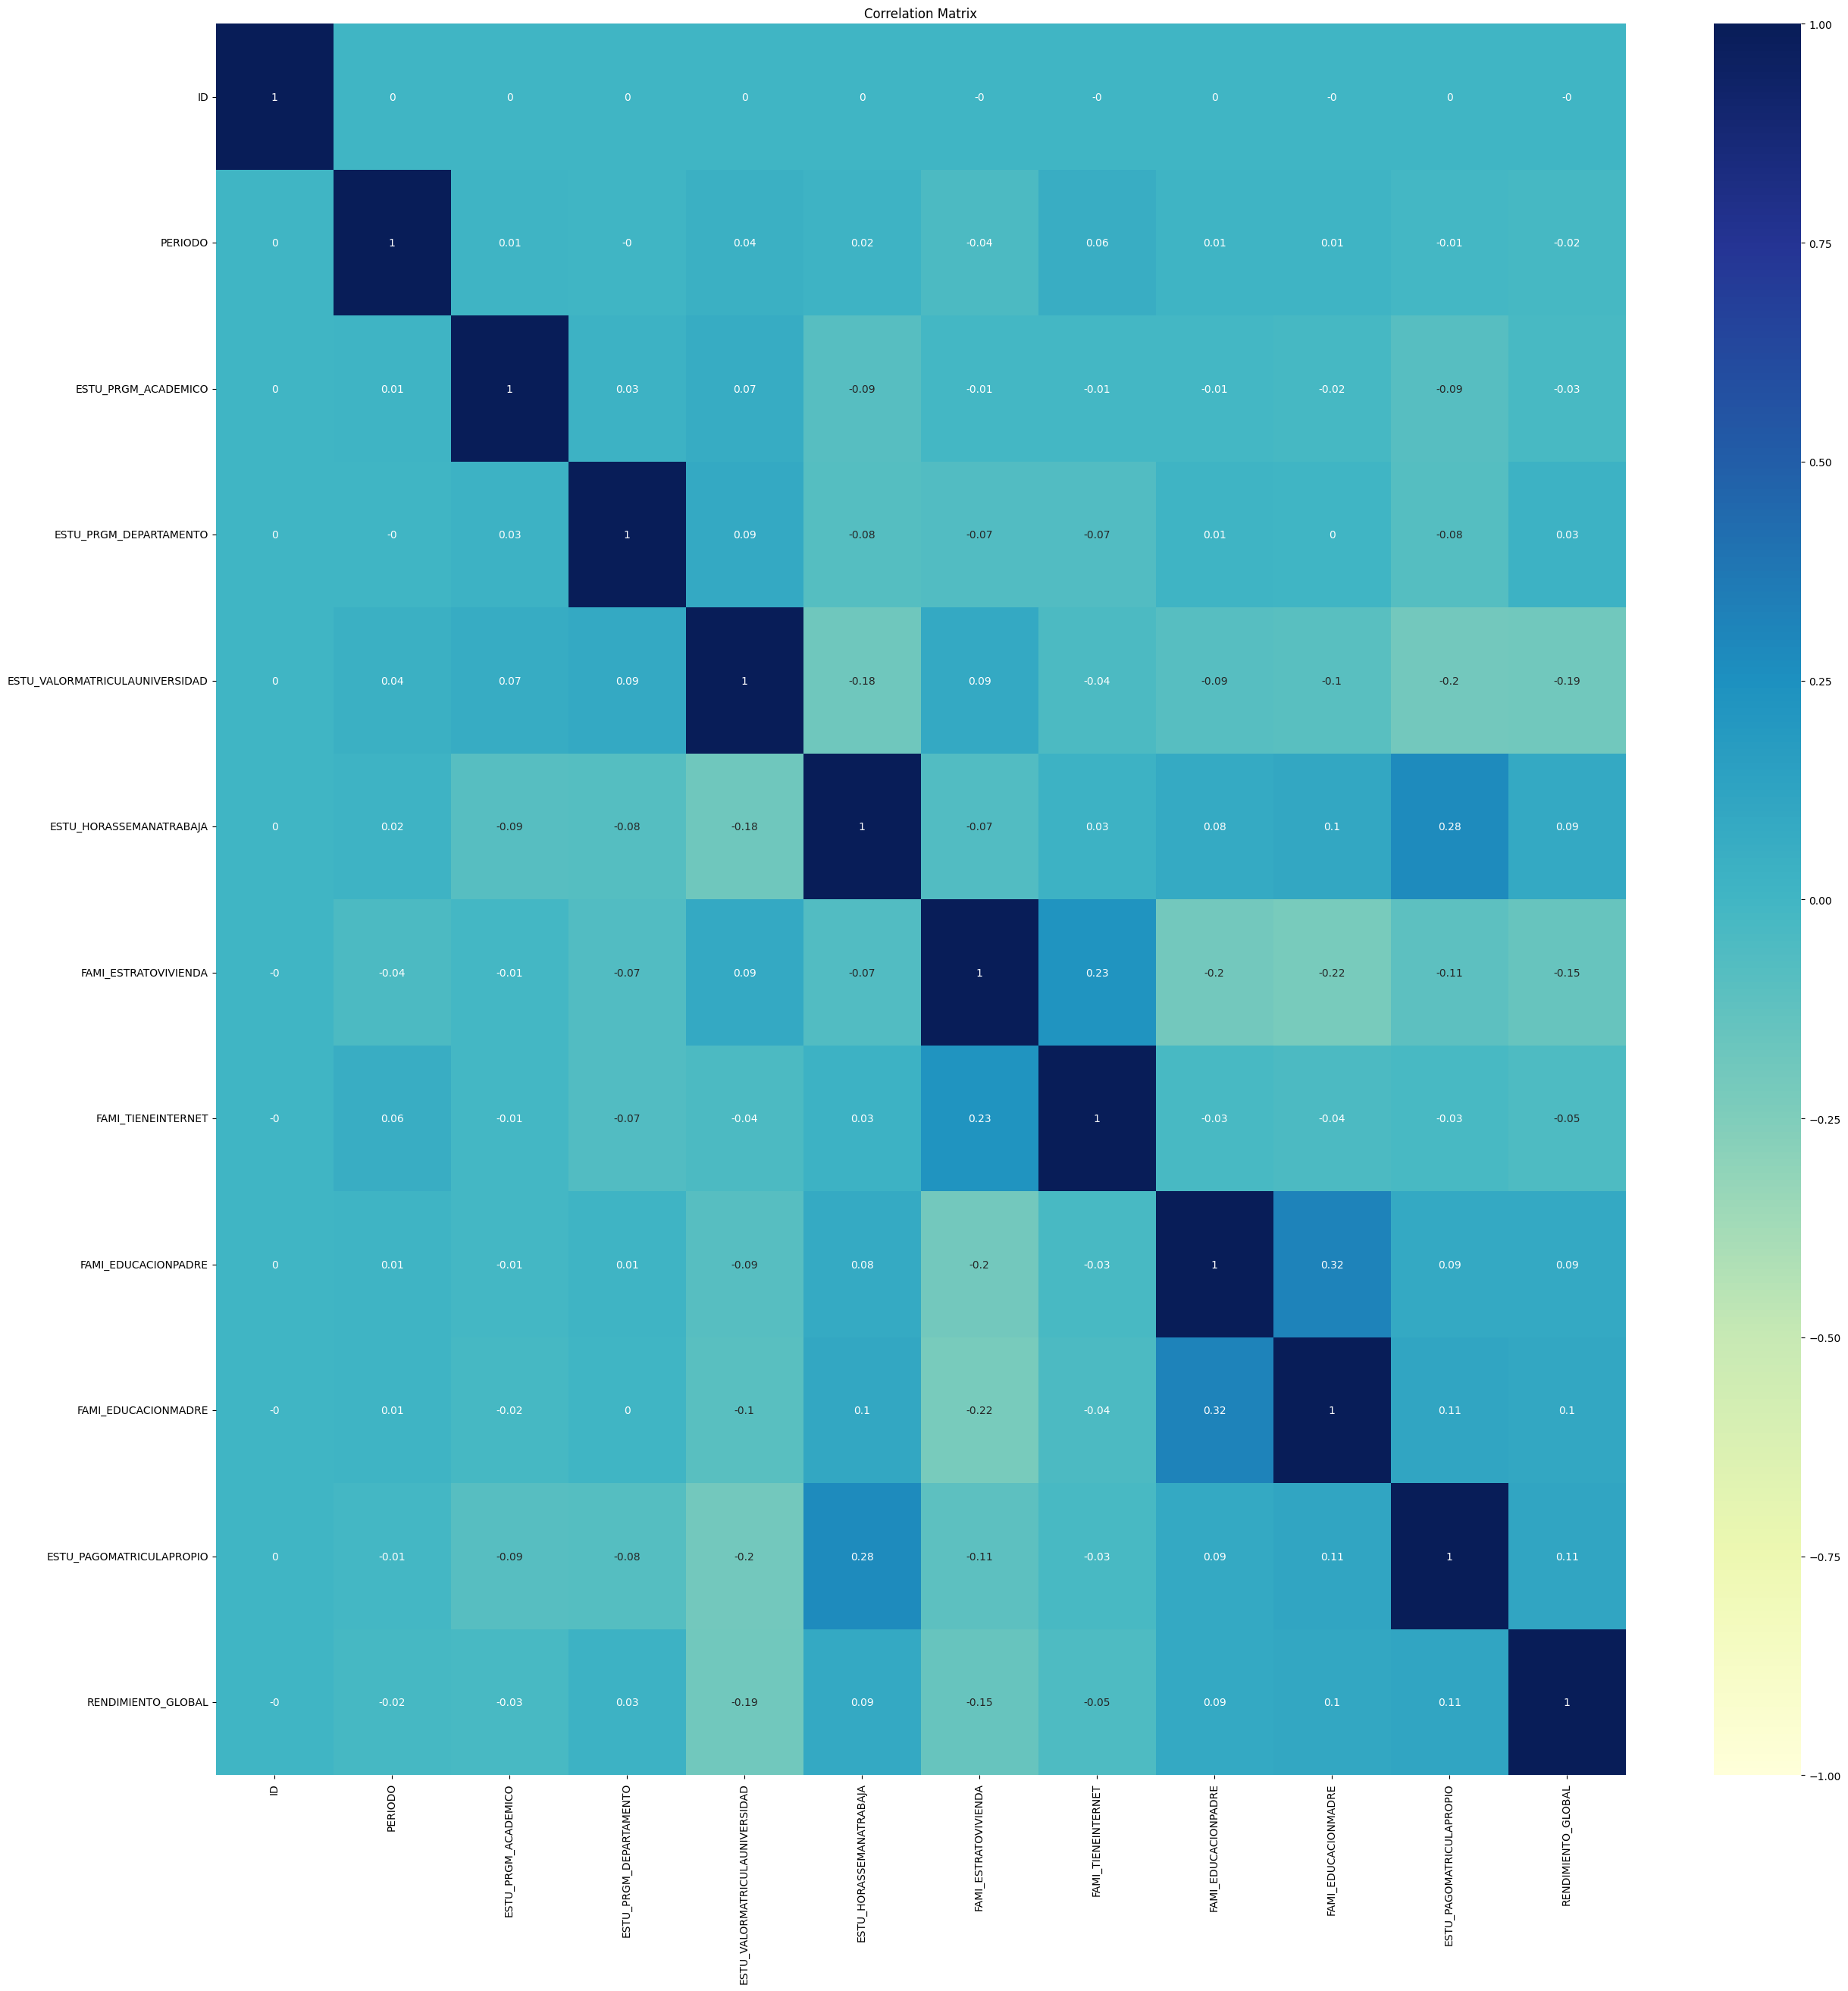

In [ ]:
#Matriz de correlaciones
corr_matrix = df.corr().round(2)
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

In [ ]:
#Correlaciones de las variables con la variable objetivo
target_corr_df = corr_matrix["RENDIMIENTO_GLOBAL"].sort_values(ascending=False)
target_corr_df = pd.DataFrame(target_corr_df)
target_corr_df


,RENDIMIENTO_GLOBAL
RENDIMIENTO_GLOBAL,1.00
ESTU_PAGOMATRICULAPROPIO,0.11
FAMI_EDUCACIONMADRE,0.10
ESTU_HORASSEMANATRABAJA,0.09
FAMI_EDUCACIONPADRE,0.09
ESTU_PRGM_DEPARTAMENTO,0.03
ID,-0.00
PERIODO,-0.02
ESTU_PRGM_ACADEMICO,-0.03
FAMI_TIENEINTERNET,-0.05


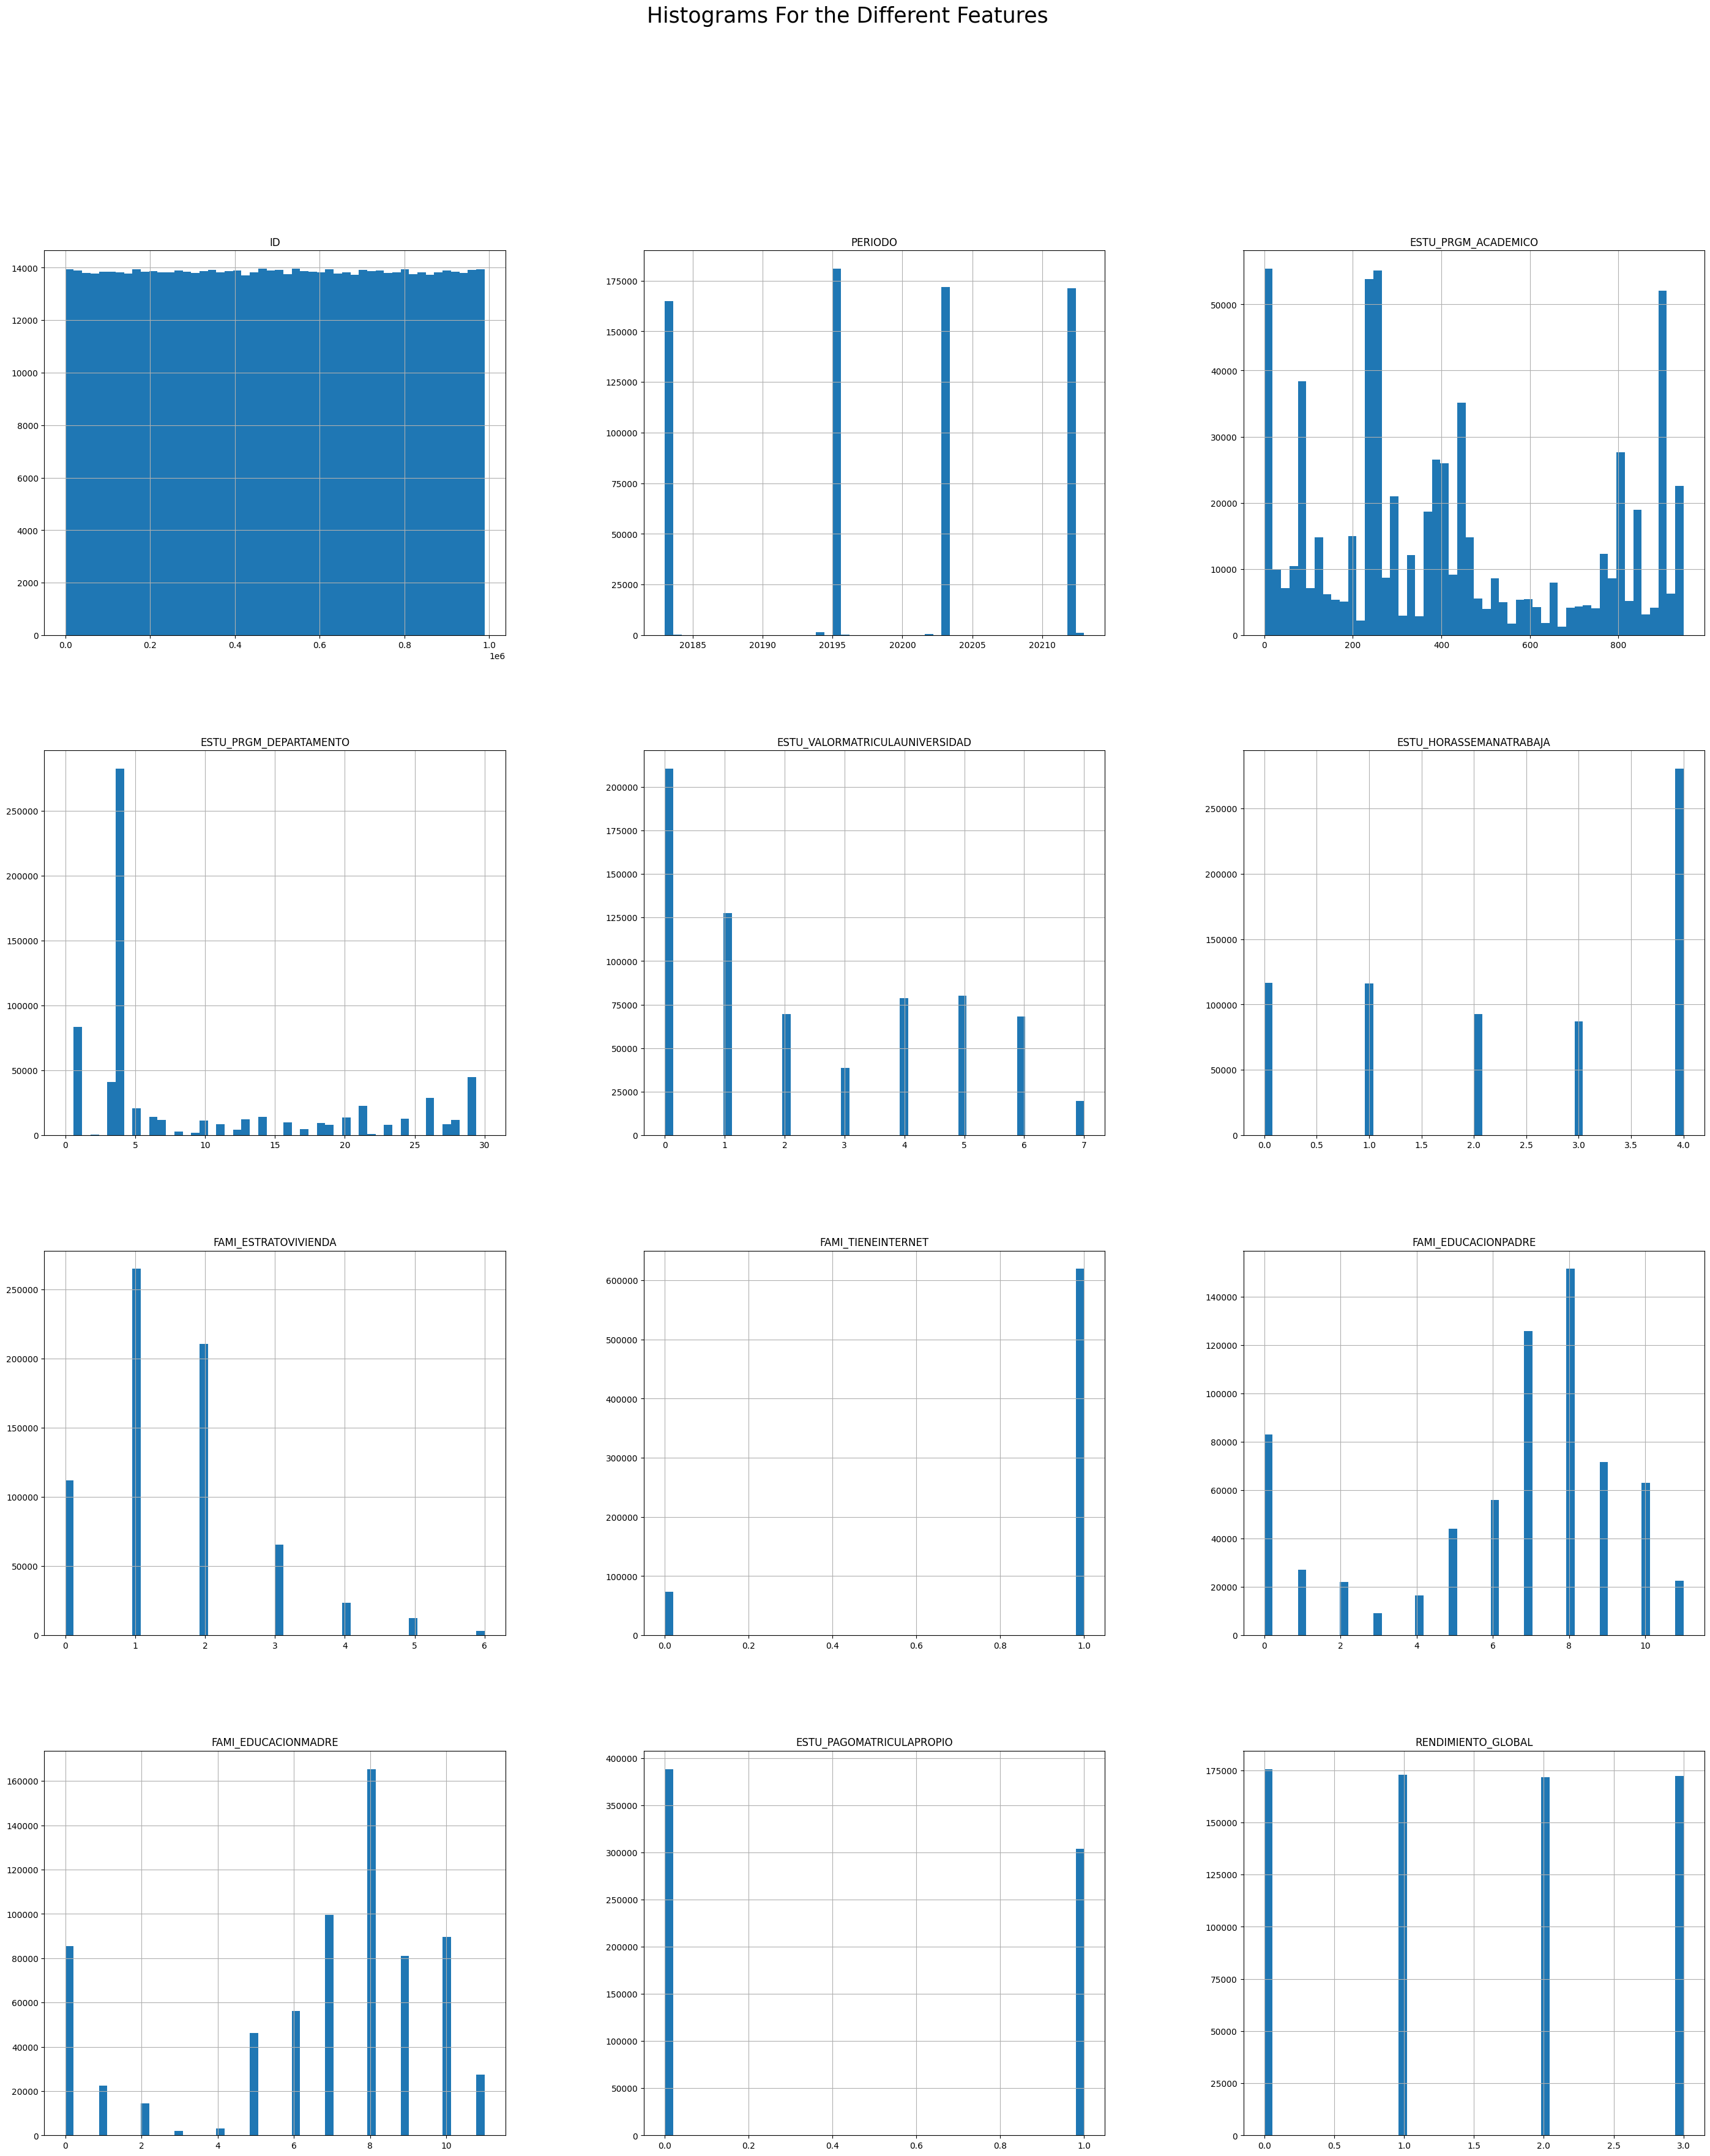

In [ ]:
#Gráficos de los histogramas de las distribuciones de las variables
df.hist(bins=50, figsize=(35,40))
plt.suptitle('Histograms For the Different Features', fontsize=25)
plt.show()


###Prueba de Modelos


In [ ]:
print(df_final.columns)


Index(['ID', 'PERIODO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE',
       'ESTU_PRGM_ACADEMICO_ACUICULTURA', 'ESTU_PRGM_ACADEMICO_ADMINISTRACION',
       'ESTU_PRGM_ACADEMICO_ADMINISTRACION  FINANCIERA',
       'ESTU_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO',
       'ESTU_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA',
       'ESTU_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA',
       ...
       'FAMI_EDUCACIONMADRE_Primaria completa',
       'FAMI_EDUCACIONMADRE_Primaria incompleta',
       'FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa',
       'FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta',
       'FAMI_EDUCACIONMADRE_Técnica o tecnológica completa',
       'FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta',
       'ESTU_PAGOMATRICULAPROPIO_Si', 'RENDIMIENTO_GLOBAL_bajo',
       'RENDIMIENTO_GLOBAL_medio-alto', 'RENDIMIENTO_GLOBAL_medio-bajo'],
      dtype='object', length=1017)


###UNIR LAS TRES VARIABLES DE RENDIMIENTO EN UNA


In [ ]:
# Revertir el One-Hot Encoding en una sola columna para 'RENDIMIENTO_GLOBAL'
df_final['RENDIMIENTO_GLOBAL'] = (
    df_final[['RENDIMIENTO_GLOBAL_bajo', 'RENDIMIENTO_GLOBAL_medio-alto', 'RENDIMIENTO_GLOBAL_medio-bajo']]
    .idxmax(axis=1)
    .str.replace('RENDIMIENTO_GLOBAL_', '')
)

# Eliminar las columnas One-Hot originales de 'RENDIMIENTO_GLOBAL'
df_final = df_final.drop(['RENDIMIENTO_GLOBAL_bajo', 'RENDIMIENTO_GLOBAL_medio-alto', 'RENDIMIENTO_GLOBAL_medio-bajo'], axis=1)


In [ ]:
# Separar características (X) y variable objetivo (y)
X = df_final.drop('RENDIMIENTO_GLOBAL', axis=1)
y = df_final['RENDIMIENTO_GLOBAL']

# Dividir los datos en entrenamiento y validación
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


###RANDOM FOREST

In [ ]:
# Dividir los datos en entrenamiento y validación
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

# Entrenamiento y evaluación de Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)

print("Random Forest - Reporte de Clasificación:")
print(classification_report(y_val, rf_predictions))
print("Random Forest - Matriz de Confusión:")
print(confusion_matrix(y_val, rf_predictions))
print("Random Forest - Precisión:", accuracy_score(y_val, rf_predictions))

(554000, 1014)
(554000,)
Random Forest - Reporte de Clasificación:
              precision    recall  f1-score   support

        bajo       0.53      0.73      0.62     69738
  medio-alto       0.29      0.18      0.22     34259
  medio-bajo       0.31      0.19      0.23     34503

    accuracy                           0.46    138500
   macro avg       0.38      0.37      0.36    138500
weighted avg       0.42      0.46      0.42    138500

Random Forest - Matriz de Confusión:
[[50949  9568  9221]
 [22729  6254  5276]
 [22101  5980  6422]]
Random Forest - Precisión: 0.45938628158844763


*texto en cursiva*###MODELO SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Muestreo del dataset (20% del total para reducir memoria)
df_sample = df_final.sample(frac=0.2, random_state=42)

# Separar características (X) y variable objetivo (y)
X = df_sample.drop('RENDIMIENTO_GLOBAL', axis=1)
y = df_sample['RENDIMIENTO_GLOBAL']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputación de valores faltantes
imputer = SimpleImputer(strategy='mean')  # Imputación con la media
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Reducción de dimensionalidad con PCA (fijo a 50 componentes)
pca = PCA(n_components=50, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Entrenar el modelo SVM con kernel lineal para mayor eficiencia
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_pca, y_train)

# Predicción y evaluación
y_pred = svm_model.predict(X_val_pca)
print("SVM - Reporte de Clasificación:")
print(classification_report(y_val, y_pred))
print("SVM - Matriz de Confusión:")
print(confusion_matrix(y_val, y_pred))
print("SVM - Precisión:", accuracy_score(y_val, y_pred))

